<div class="alert alert-success"> 
        <h1 align="center" style="color:darkcyan;">Unet Model For Image Segmentation
</h1>  
     
</div>

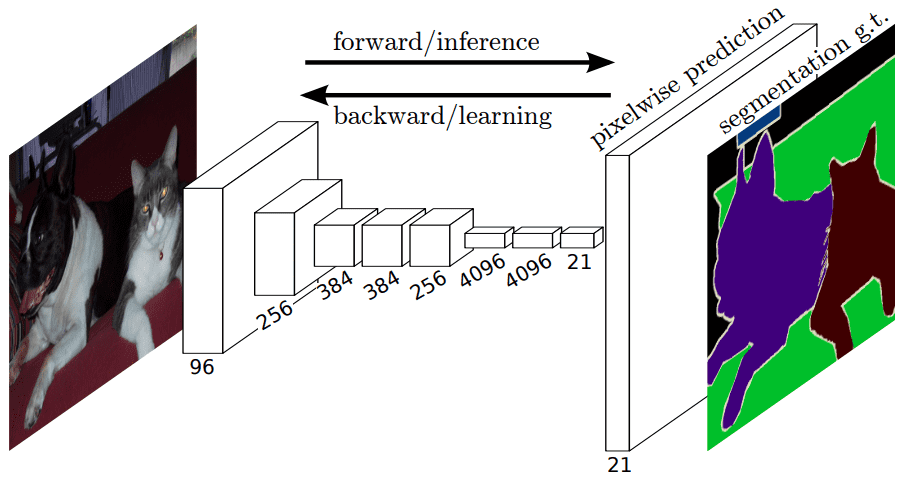

<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: #7FFFD4; font-size:100%; text-align:left">

<h3 align="center"><font color='#DAA520'>💡 About Unet Model :</font></h3>
    
<h3 align="Left"><font color='#DAA525'>💡 History :</font></h3>


The U-Net model is a convolutional neural network architecture designed for image segmentation tasks. It was first introduced by Olaf Ronneberger, Philipp Fischer, and Thomas Brox in their 2015 paper titled "U-Net: Convolutional Networks for Biomedical Image Segmentation." The U-Net architecture has been widely used in various image segmentation tasks, particularly in the field of medical image analysis.
    
Basic U-Net Architecture:

The U-Net architecture consists of an encoding path (left side) and a decoding path (right side).
The encoding path uses a series of convolutional and pooling layers to downsample the input image and capture high-level features.
The decoding path uses transposed convolutional layers to upsample the feature maps and generate the final segmentation map.
Skip connections connect corresponding layers in the encoding and decoding paths, allowing the model to preserve spatial information.  
    
U-Net Variants and Improvements:

Over the years, various variants and improvements of the U-Net architecture have been proposed to enhance its performance and versatility. Some of these variants include:
VGG U-Net: Replacing the original convolutional layers with VGG-style convolutional blocks for feature extraction.
Residual U-Net: Incorporating residual blocks (inspired by ResNet) for improved gradient flow and training stability.
Attention U-Net: Adding attention mechanisms to focus on informative regions.
Dense U-Net: Integrating dense blocks from DenseNet for feature reuse.
MultiRes U-Net: Combining multi-resolution feature maps for better segmentation.

<div class="alert alert-success"> 
        <h1 align="center" style="color:darkcyan;">Import Libraries and Dependecy
</h1>  
     
</div>

In [1]:
import xml.etree.ElementTree as ET
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
from pathlib import Path
import random
import glob
import tensorflow as tf
from tensorflow.keras.layers import Dense, Flatten, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

2024-04-10 14:14:55.151808: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-10 14:14:55.151943: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-10 14:14:55.309697: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


<div class="alert alert-success"> 
        <h1 align="center" style="color:darkcyan;">Reading The data
</h1>  
     
</div>

In [2]:
image_path = '/kaggle/input/roads-segmentation-dataset/images'
mask_path  = '/kaggle/input/roads-segmentation-dataset/masks'

<div class="alert alert-success"> 
        <h1 align="center" style="color:darkcyan;">Function to display the images
</h1>  
     
</div>

In [3]:
def display_image(image_folder):
    
    image_files = [f for f in (os.listdir(image_folder)) if f.endswith(('jpg','png','jpeg'))]
    
    #print(image_files)
    
    fig,axes = plt.subplots(3,3,figsize=(10,10))
    
    for i, file_name in enumerate(image_files):  
        
        if i>=9:
            break
        row = i//3
        col = i%3
        
         # Load and display the image in the current subplot
        image_path = os.path.join(image_folder, file_name)
        image = cv2.imread(image_path)
        axes[row, col].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        axes[row, col].set_title(file_name)
        axes[row, col].axis('off')
        
        
    # Ensure proper layout and show the plots
    plt.tight_layout()
    plt.show()
    

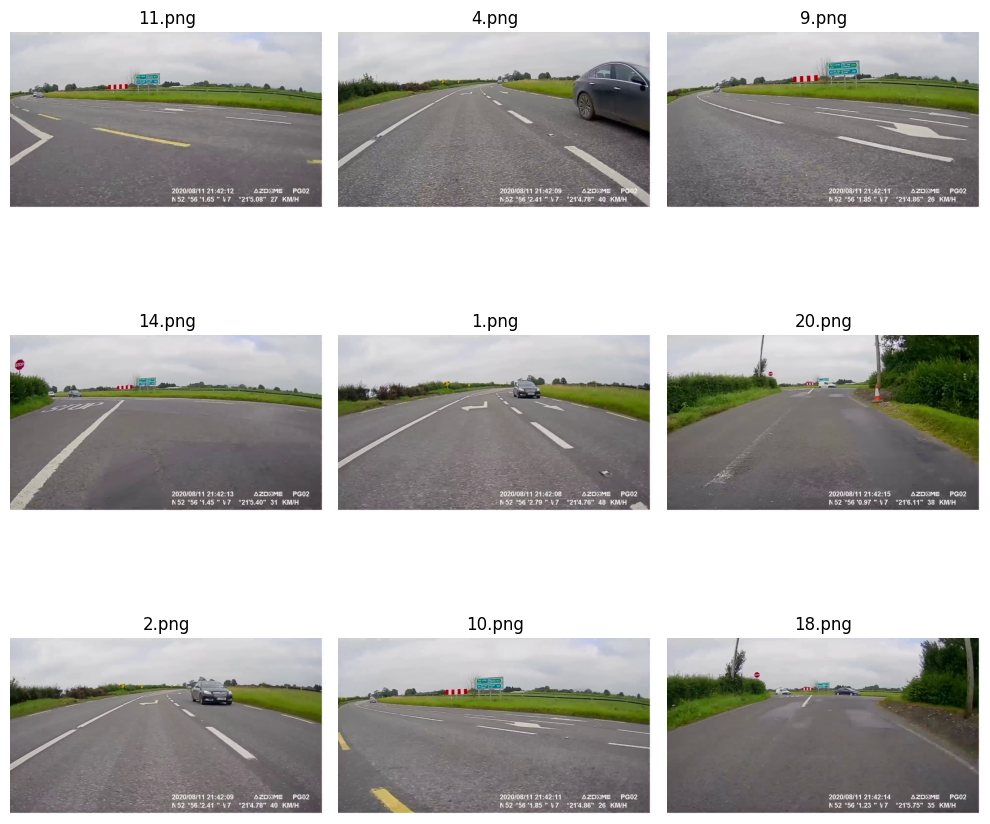

In [4]:
# Specify the folder path containing the images
image_folder = '/kaggle/input/roads-segmentation-dataset/images'  # Replace with the path to your image folder
display_image(image_folder)

<div class="alert alert-success"> 
        <h1 align="center" style="color:darkcyan;">Function to display Mask
</h1>  
     
</div>

In [5]:
def mask_image(image_folder):
    
    image_files = [f for f in (os.listdir(image_folder)) if f.endswith(('jpg','png','jpeg'))]
    
    #print(image_files)
    
    fig,axes = plt.subplots(3,3,figsize=(10,10))
    
    for i, file_name in enumerate(image_files):  
        
        if i>=9:
            break
        row = i//3
        col = i%3
        
         # Load and display the image in the current subplot
        image_path = os.path.join(image_folder, file_name)
        image = cv2.imread(image_path)
        axes[row, col].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        axes[row, col].set_title(file_name)
        axes[row, col].axis('off')
        
        
    # Ensure proper layout and show the plots
    plt.tight_layout()
    plt.show()


<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: #00FA9A; font-size:100%; text-align:left">

<h3 align="center"><font color='#DAA520'>💡About the Function:</font></h3>
    
This Python function, display_image(image_folder), accepts a directory path as input. It lists image files (with 'jpg', 'png', or 'jpeg' extensions) in that folder and displays up to 9 of them in a 3x3 grid using Matplotlib subplots. It loads and shows each image, converting from BGR to RGB format if necessary. The image filenames serve as subplot titles, and axis labels are turned off for clarity. Finally, it ensures proper layout and displays the grid, making it a convenient tool for quick visual inspection of image data in the specified folder.


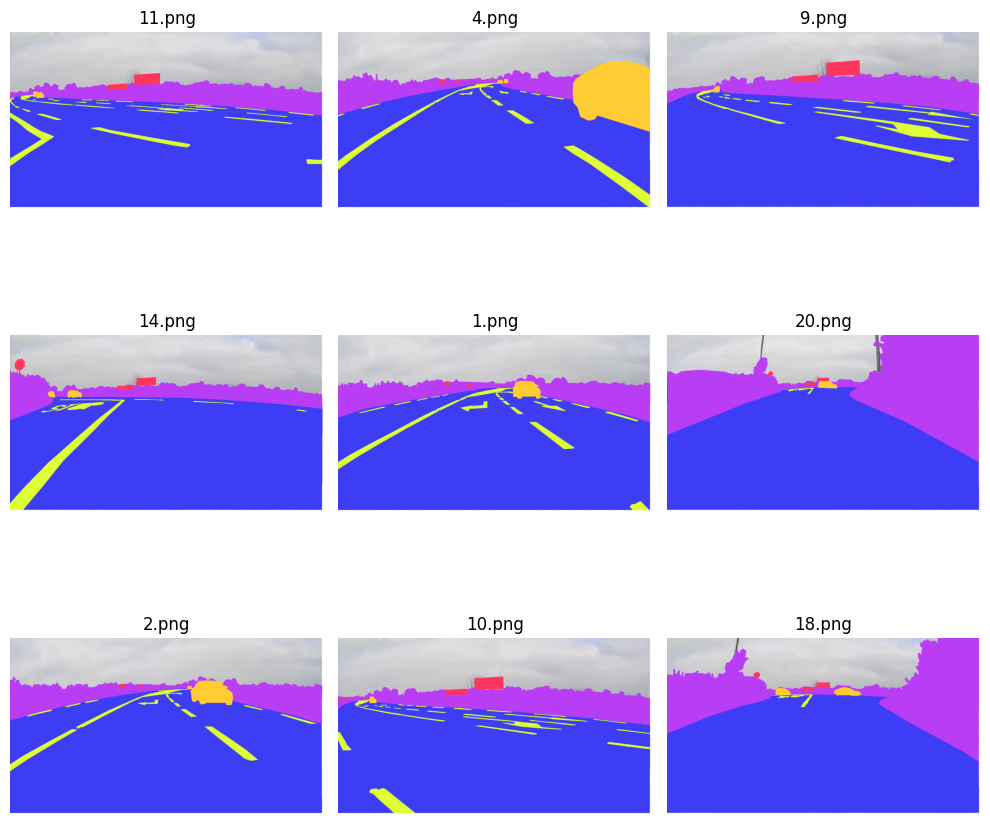

In [6]:
image_folder = '/kaggle/input/roads-segmentation-dataset/masks'
mask_image(image_folder)

In [7]:
image_path = "/kaggle/input/roads-segmentation-dataset/images/*.png"
mask_path = "/kaggle/input/roads-segmentation-dataset/masks/*.png"
image_paths = sorted(glob.glob(image_path), key=lambda x: x.split('.')[0])
mask_paths = sorted(glob.glob(mask_path), key=lambda x: x.split('.')[0])

<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: #FFFAF0; font-size:100%; text-align:left">

<h3 align="center"><font color='#DAA520'>💡What does above code do:</font></h3>
    

The code uses glob.glob to find PNG files in a directory specified by image_path.
It sorts the file paths to maintain a consistent order using a custom sorting key.
The key function extracts the base filename without the extension from each path.
This sorting is helpful for organizing and processing image files in a specific order.
The resulting image_paths list contains the sorted file paths ready for further processing.


In [8]:
def resize_image(image, size):
    # Resize the image to the specified size
    resized_image = cv2.resize(image, size)
    return resized_image

def resize_mask(mask, size):
    # Convert the mask to grayscale
    mask_gray = cv2.cvtColor(mask, cv2.COLOR_RGB2GRAY)
    resized_mask = cv2.resize(mask_gray, size, interpolation=cv2.INTER_NEAREST)
    resized_mask = np.expand_dims(resized_mask, axis=2)
    return resized_mask

<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: #00FA9A; font-size:100%; text-align:left">

<h3 align="center"><font color='#DAA520'>💡Function to resize the data:</font></h3>
    


The resize_image function resizes input images to a specified size using OpenCV.
The resize_mask function is specialized for resizing segmentation masks. It converts them to grayscale, resizes with nearest-neighbor interpolation, and ensures a single channel.
These functions are useful for preparing image and mask data for machine learning tasks like image segmentation.
The interpolation choice in resize_mask is crucial for preserving binary or discrete mask values.
Both functions provide essential preprocessing steps in image segmentation pipelines.

In [9]:
# Define the desired size
target_size = (512,512)
image_list = []
mask_list = []
for image_path, mask_path in zip(image_paths, mask_paths):
    # Load the image and mask
    image = plt.imread(image_path).astype(np.float32)
    mask = plt.imread(mask_path).astype(np.float32)

    # Resize the image and mask
    resized_image = resize_image(image, target_size)
    resized_mask = resize_mask(mask, target_size)

    image_list.append(resized_image)
    mask_list.append(resized_mask)

# Convert the image and mask lists to arrays
image_array = np.array(image_list)
mask_array = np.array(mask_list)

<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: #00FA9A; font-size:100%; text-align:left">

<h3 align="center"><font color='#DAA520'>💡About the above pre-process of image:</font></h3>
    

The code loads a set of image and mask pairs, resizes them to a specified size, and stores them in lists.
It leverages functions for resizing and preprocessing images and masks.
The resulting image_array and mask_array are NumPy arrays containing the resized image and mask data, respectively.
This code is commonly used when preparing image segmentation datasets for machine learning tasks.

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(image_array,mask_array, test_size=0.2, random_state=23)

<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: #FFFAF0; font-size:100%; text-align:left">

<h3 align="center"><font color='#DAA520'>💡Unet Architecture:</font></h3>
    
It creates a U-Net model for image segmentation tasks.
The model consists of an encoder section with convolutional and pooling layers followed by a decoder section with upsampling and skip connections.
Skip connections are used to preserve spatial information during upsampling.
The final decoder layer uses a sigmoid activation for binary output, typically for segmentation masks.
The function returns the created U-Net model with the specified input shape, ready for training on image segmentation tasks.


In [11]:
import tensorflow as tf

def create_unet_model(input_shape=(512, 512, 3)):
    # Define the input layer
    x = tf.keras.layers.Input(input_shape)

    # Encoder layers
    enc1 = tf.keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu')(x)
    enc2 = tf.keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu')(enc1)
    enc3 = tf.keras.layers.MaxPooling2D((2, 2))(enc2)
    enc3 = tf.keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu')(enc3)
    enc4 = tf.keras.layers.Conv2D(128, (3, 3), padding='same', activation='relu')(enc3)
    enc5 = tf.keras.layers.Conv2D(128, (3, 3), padding='same', activation='relu')(enc4)
    enc6 = tf.keras.layers.MaxPooling2D((2, 2))(enc5)
    enc6 = tf.keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu')(enc6)
    enc7 = tf.keras.layers.Conv2D(256, (3, 3), padding='same', activation='relu')(enc6)
    enc8 = tf.keras.layers.Conv2D(1, (3, 3), padding='same', activation='relu')(enc7)

    # Skip connections
    skip1 = enc2
    skip2 = enc5

    # Decoder layers
    dec1 = tf.keras.layers.UpSampling2D((2, 2))(enc8)
    dec1 = tf.keras.layers.Concatenate()([dec1, skip2])
    dec1 = tf.keras.layers.Conv2D(128, (3, 3), padding='same', activation='relu')(dec1)
    dec1 = tf.keras.layers.Conv2D(128, (3, 3), padding='same', activation='relu')(dec1)

    dec2 = tf.keras.layers.UpSampling2D((2, 2))(dec1)
    dec2 = tf.keras.layers.Concatenate()([dec2, skip1])
    dec2 = tf.keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu')(dec2)
    dec2 = tf.keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu')(dec2)

    # Final decoder layer with sigmoid activation for binary output
    dec3 = tf.keras.layers.Conv2D(1, (3, 3), padding='same', activation='sigmoid')(dec2)

    # Create and return the model
    model = tf.keras.Model(inputs=x, outputs=dec3)
    return model

In [12]:
model = create_unet_model()

In [13]:
loss = tf.keras.losses.BinaryCrossentropy()
model.compile(optimizer='adam', loss=loss, metrics=['accuracy'])

In [14]:
history = model.fit(X_train,y_train, batch_size=16, epochs=5,validation_data=(X_test, y_test))

Epoch 1/5
2/2 ━━━━━━━━━━━━━━━━━━━━ 189s 71s/step - accuracy: 0.0020 - loss: 0.6911 - val_accuracy: 0.0020 - val_loss: 0.6910
Epoch 2/5
2/2 ━━━━━━━━━━━━━━━━━━━━ 212s 72s/step - accuracy: 0.0024 - loss: 0.6900 - val_accuracy: 0.0020 - val_loss: 0.6891
Epoch 3/5
2/2 ━━━━━━━━━━━━━━━━━━━━ 184s 71s/step - accuracy: 0.0024 - loss: 0.6887 - val_accuracy: 0.0020 - val_loss: 0.6876
Epoch 4/5
2/2 ━━━━━━━━━━━━━━━━━━━━ 204s 71s/step - accuracy: 0.0024 - loss: 0.6855 - val_accuracy: 0.0020 - val_loss: 0.6847
Epoch 5/5
2/2 ━━━━━━━━━━━━━━━━━━━━ 219s 73s/step - accuracy: 0.0024 - loss: 0.6824 - val_accuracy: 0.0020 - val_loss: 0.6834


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


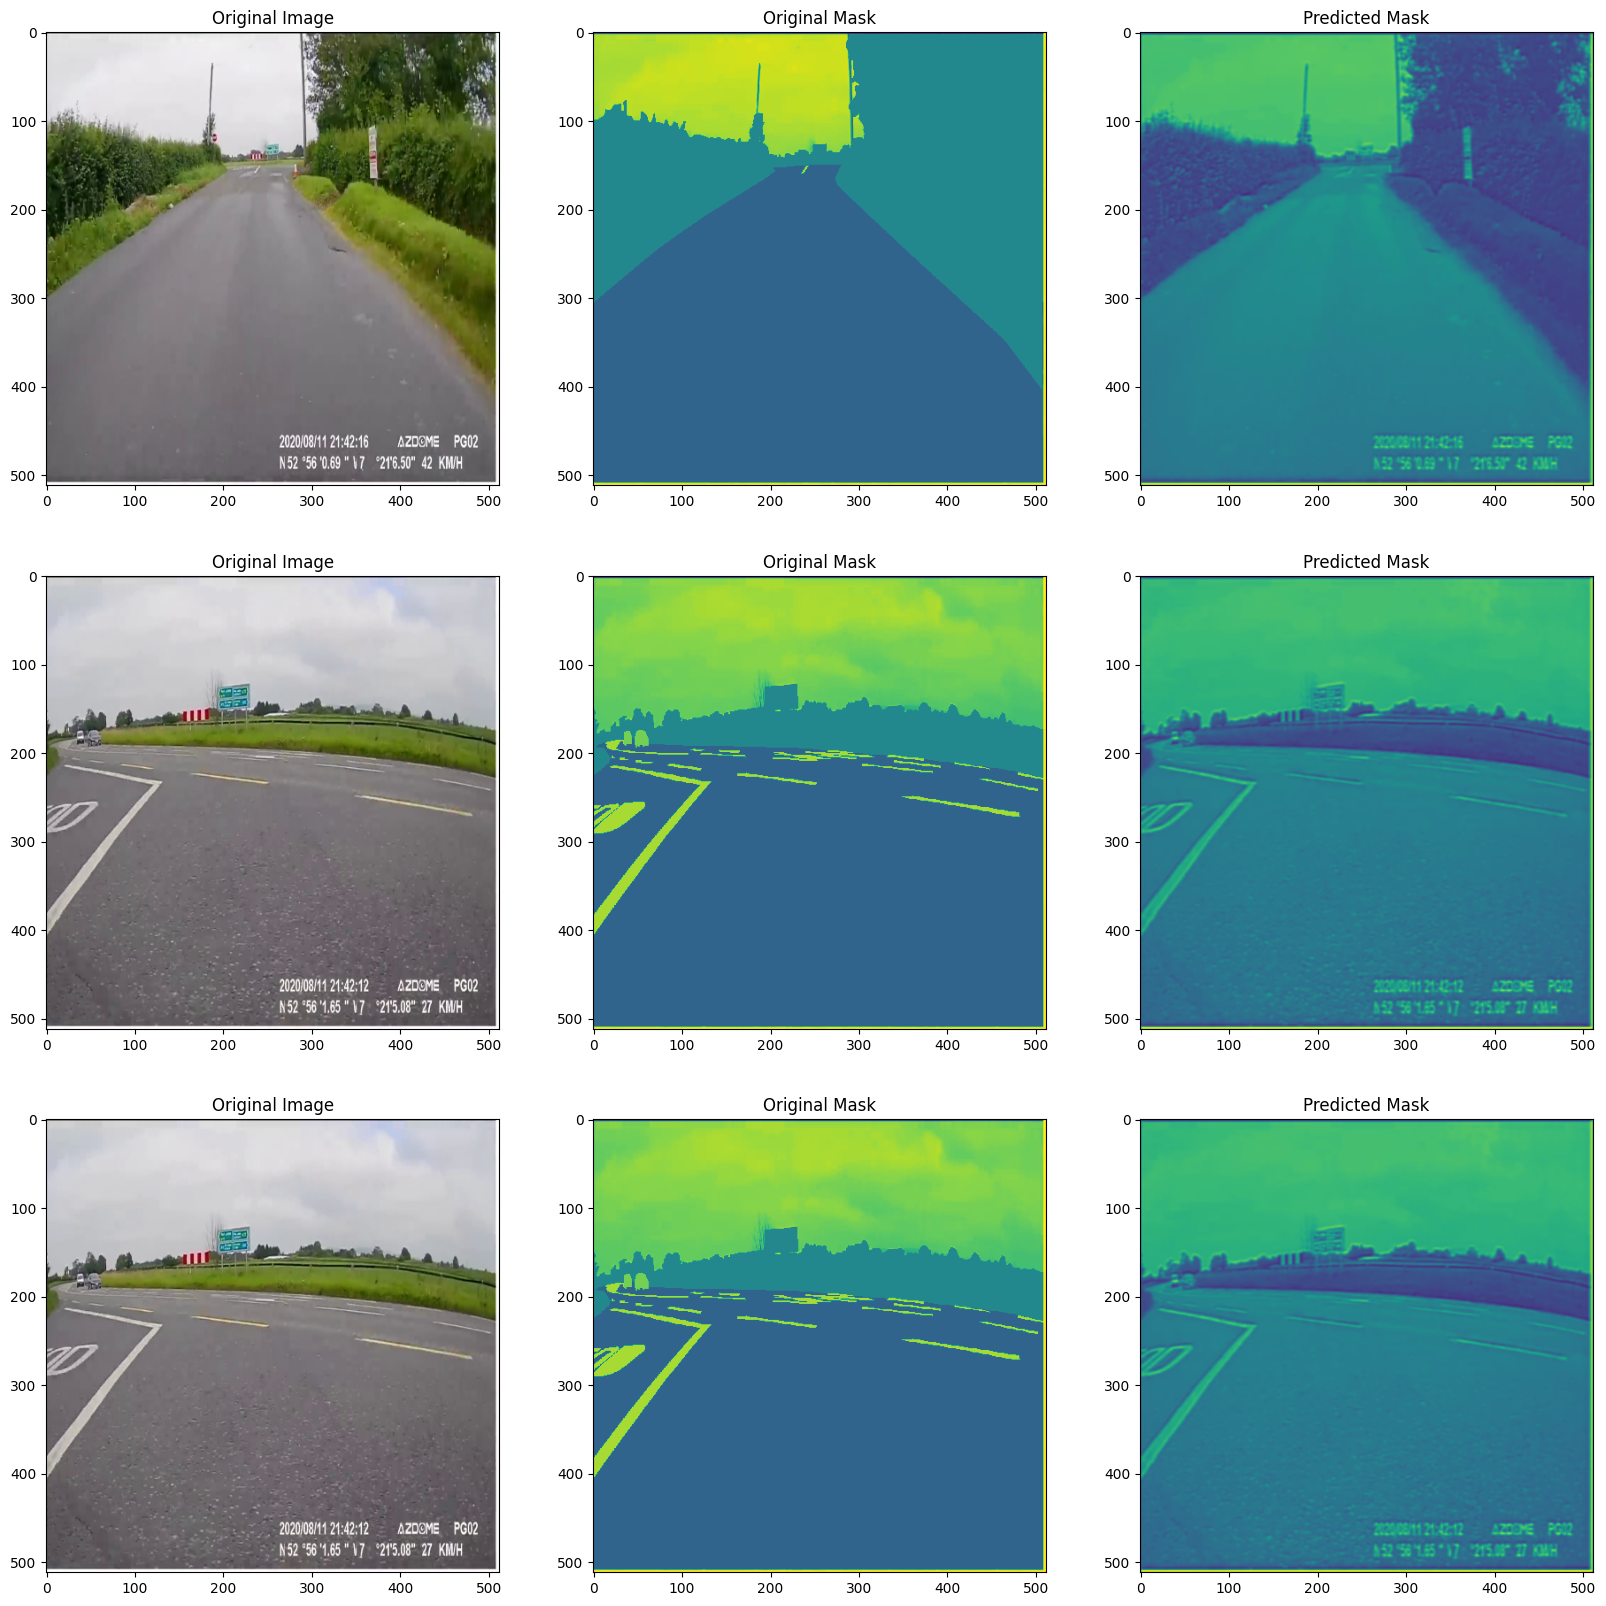

In [15]:
figure, axes = plt.subplots(3,3, figsize=(20,20))

for i in range(0,3):
    rand_num = random.randint(0,5)
    original_img = X_test[rand_num]
    axes[i,0].imshow(original_img)
    axes[i,0].title.set_text('Original Image')
    
    original_mask = y_test[rand_num]
    axes[i,1].imshow(original_mask)
    axes[i,1].title.set_text('Original Mask')
    
    original_img = np.expand_dims(original_img, axis=0)
    predicted_mask = model.predict(original_img).reshape(512,512)
    axes[i,2].imshow(predicted_mask)
    axes[i,2].title.set_text('Predicted Mask')

<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: #00FA9A; font-size:100%; text-align:left">

<h3 align="center"><font color='#DAA520'>💡To show predicted and original difference:</font></h3>
    


It selects a random image and its associated mask from the X_test and y_test datasets.
It displays the original image, original mask, and the predicted mask side by side in the subplots.
The original image and mask are shown in the first and second columns, respectively.
The third column displays the predicted mask generated by the model.predict() function after expanding the image's dimensions and reshaping the predicted mask.

<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: #FFFAF0; font-size:100%; text-align:left">

<h3 align="center"><font color='#DAA520'>💡Conclusion:</font></h3>
    

The Model should be trained for More no of epoch
The accuracy of model will improve as it can be seen model is able to capture features of mask .